In [ ]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
tf.__version__
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# create your kaggle API token at your account, download the token (kaggle.json) in your local, and upload it here
!pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1
!ls

100% 753M/754M [00:09<00:00, 68.9MB/s]
100% 754M/754M [00:09<00:00, 84.5MB/s]
kaggle.json  mask-datasets-v1.zip  sample_data


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  mask-datasets-v1.zip
  inflating: Mask_Datasets/Train/Mask/1.PNG  
  inflating: Mask_Datasets/Train/Mask/10.PNG  
  inflating: Mask_Datasets/Train/Mask/100.PNG  
  inflating: Mask_Datasets/Train/Mask/101.PNG  
  inflating: Mask_Datasets/Train/Mask/102.PNG  
  inflating: Mask_Datasets/Train/Mask/103.PNG  
  inflating: Mask_Datasets/Train/Mask/104.PNG  
  inflating: Mask_Datasets/Train/Mask/105.PNG  
  inflating: Mask_Datasets/Train/Mask/106.PNG  
  inflating: Mask_Datasets/Train/Mask/107.PNG  
  inflating: Mask_Datasets/Train/Mask/108.PNG  
  inflating: Mask_Datasets/Train/Mask/109.PNG  
  inflating: Mask_Datasets/Train/Mask/11.PNG  
  inflating: Mask_Datasets/Train/Mask/110.PNG  
  inflating: Mask_Datasets/Train/Mask/111.PNG  
  inflating: Mask_Datasets/Train/Mask/112.PNG  
  inflating: Mask_Datasets/Train/Mask/113.PNG  
  inflating: Mask_Datasets/Train/Mask/114.PNG  
  inflating: Mask_Datasets/Train/Mask/115.PNG  
  inflating: Mask_Datasets/Train/Mask/116.PNG  
  inflating: 

In [ ]:
!ls

kaggle.json  Mask_Datasets  sample_data


In [ ]:
image_size = 160
batch_size = 32

train_dir = 'Mask_Datasets/Train/'
valid_dir = 'Mask_Datasets/Validation/'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 750 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [ ]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 2,626,722
Trainable params: 368,738
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [ ]:
%%time
history = model.fit(
    train_generator,
    epochs = 10,
    verbose=1,
    validation_data = valid_generator
)

Epoch 1/10
24/24 [==============================] - 31s 1s/step - loss: 0.4800 - accuracy: 0.8920 - val_loss: 0.1393 - val_accuracy: 0.9743
Epoch 2/10
24/24 [==============================] - 31s 1s/step - loss: 0.0693 - accuracy: 0.9867 - val_loss: 0.0200 - val_accuracy: 0.9914
Epoch 3/10
24/24 [==============================] - 31s 1s/step - loss: 0.0651 - accuracy: 0.9880 - val_loss: 0.0835 - val_accuracy: 0.9829
Epoch 4/10
24/24 [==============================] - 31s 1s/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0574 - val_accuracy: 0.9943
Epoch 5/10
24/24 [==============================] - 31s 1s/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 0.0329 - val_accuracy: 0.9943
Epoch 6/10
24/24 [==============================] - 31s 1s/step - loss: 0.0279 - accuracy: 0.9893 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 7/10
24/24 [==============================] - 31s 1s/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0410 - val_accuracy: 0.9914
Epoch 8/10
24/24 [==

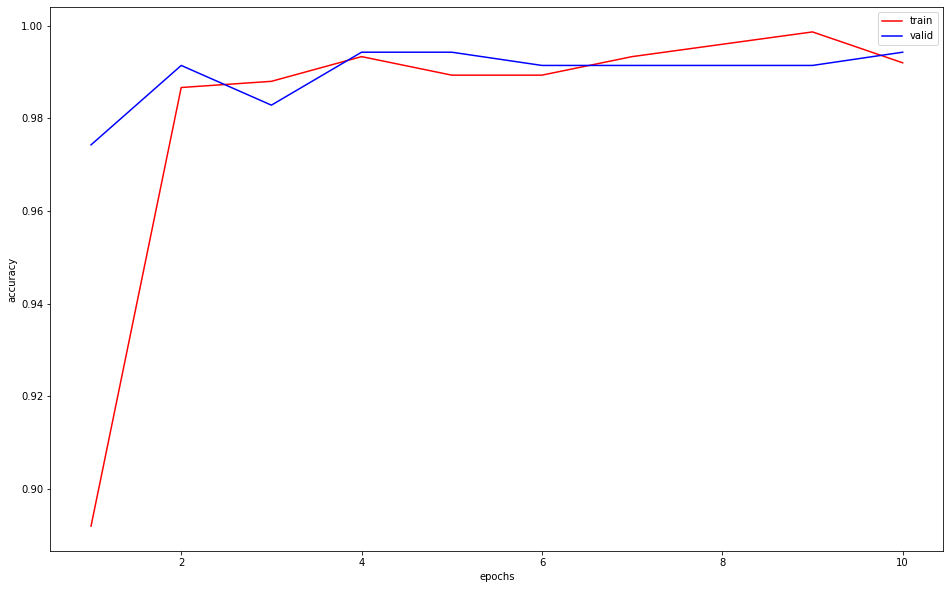

In [ ]:
epochs = np.arange(1,len(history.history['loss'])+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(16,10))
plt.plot(epochs, train_acc, 'r', label='train' )
plt.plot(epochs, val_acc, 'b', label='valid')
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('improvedaccfreeze.png')

In [ ]:
files.download("improvedaccfreeze.png")

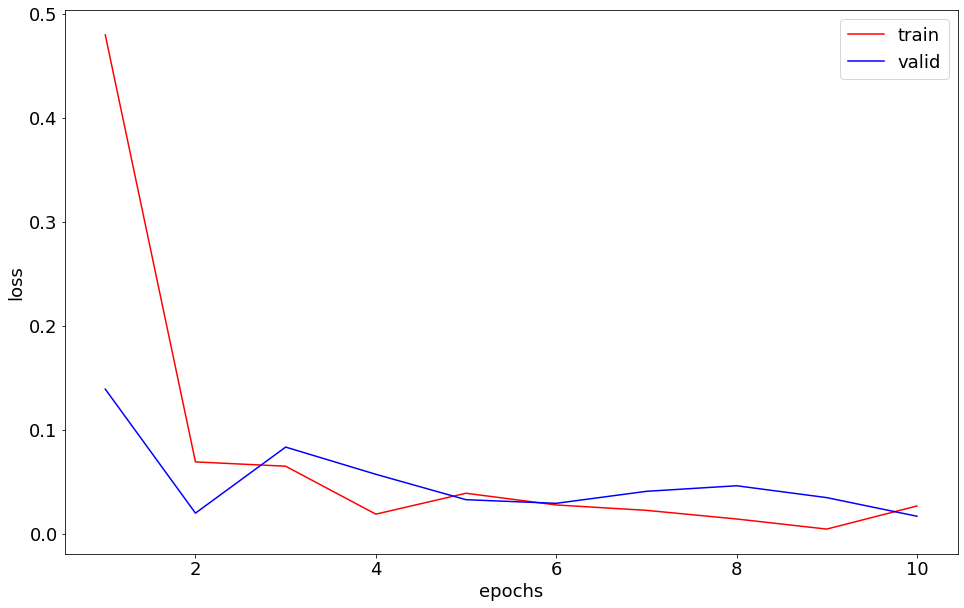

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(epochs, train_loss, 'r', label='train')
plt.plot(epochs, val_loss, 'b', label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('improvedlossfreeze.png')

In [ ]:
files.download("improvedlossfreeze.png")

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 2,626,722
Trainable params: 2,231,330
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


In [ ]:
%%time
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=valid_generator, 
                         validation_steps=len(valid_generator))

Epoch 1/10
24/24 [==============================] - 30s 1s/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0263 - val_accuracy: 0.9914
Epoch 2/10
24/24 [==============================] - 31s 1s/step - loss: 0.0289 - accuracy: 0.9893 - val_loss: 0.0268 - val_accuracy: 0.9914
Epoch 3/10
24/24 [==============================] - 30s 1s/step - loss: 0.0313 - accuracy: 0.9933 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 4/10
24/24 [==============================] - 31s 1s/step - loss: 0.0392 - accuracy: 0.9840 - val_loss: 0.0299 - val_accuracy: 0.9914
Epoch 5/10
24/24 [==============================] - 31s 1s/step - loss: 0.0349 - accuracy: 0.9867 - val_loss: 0.0259 - val_accuracy: 0.9914
Epoch 6/10
24/24 [==============================] - 31s 1s/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0244 - val_accuracy: 0.9943
Epoch 7/10
24/24 [==============================] - 31s 1s/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0231 - val_accuracy: 0.9943
Epoch 8/10
24/24 [==

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labelssoftmax.txt', 'w') as f:
  f.write(labels)

{'Mask': 0, 'No_mask': 1}


In [ ]:
!ls

improvedaccfreeze.png	kaggle.json	   Mask_Datasets	 sample_data
improvedlossfreeze.png	labelssoftmax.txt  modelimproved.tflite


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelimproved.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!ls

improvedaccfreeze.png	kaggle.json	   Mask_Datasets	 sample_data
improvedlossfreeze.png	labelssoftmax.txt  modelimproved.tflite


In [ ]:
from google.colab import files

files.download('modelimproved.tflite')
files.download('labelssoftmax.txt')
# files.download('model.h5') #uncomment if you need the regular model

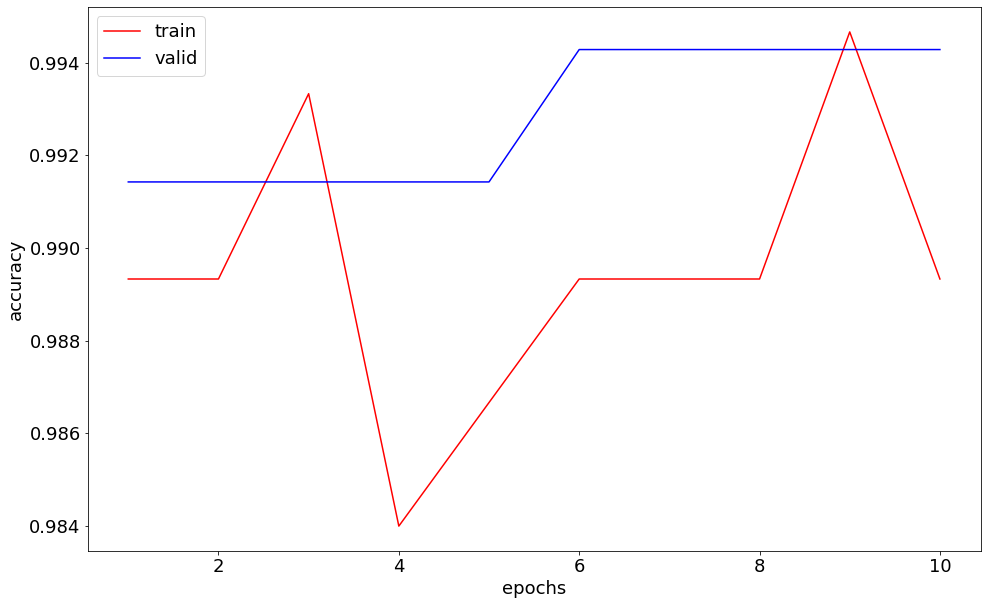

In [ ]:
epochs = np.arange(1,len(history_fine.history['loss'])+1)
train_loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

train_acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
plt.figure(figsize=(16,10))
plt.plot(epochs, train_acc, 'r', label='train' )
plt.plot(epochs, val_acc, 'b', label='valid')
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('improvedacc.png')

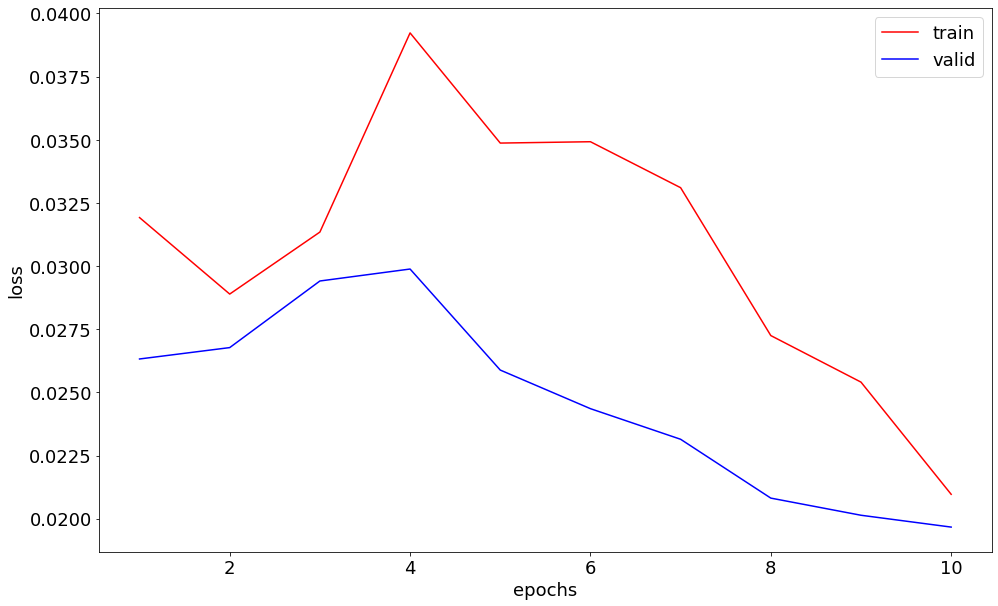

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(epochs, train_loss, 'r', label='train')
plt.plot(epochs, val_loss, 'b', label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('improvedloss.png')

In [ ]:
!ls

improvedaccfreeze.png	improvedloss.png   Mask_Datasets
improvedacc.png		kaggle.json	   modelimproved.tflite
improvedlossfreeze.png	labelssoftmax.txt  sample_data


In [ ]:
files.download("improvedacc.png")
files.download("improvedloss.png")